# Data visualizations using R


## Overview

R is flexible. Often, there is more than one way to get something done. And this is true when considering visualizations as well. Broadly, there are 3 ways in which you can create visualizations in R:

* Using `base` R: This refers to the set of commands and functionality available to the user without installing other packages. 
* Using the `lattice` package: Created by Deepayan Sarkar to elevate `base` R's graphing capabilities. Useful for visualizing multivariate data. 
* Using the `ggplot2` package: Created by Hadley Wickham as R's implementation of the *Grammar of Graphics*. While that might sound complicated, it is essentially a framework that allows the user to describe and construct visualizations in a *layered* manner. This [blog post](https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149) offers a great introduction to the philosophy of the *Grammar of Graphics*. 

The `ggplot2` package offers a tremendous amount of functionality and customizability. It is also the most popular graphing package used by R users, making it easy to find help online ([Stackoverflow](https://stackoverflow.com/) is your best friend). These advantages make it an obvious choice for creating graphs in R and we will be using it in this lesson. 

## Intro to `ggplot2`

While it is challenging to briefly describe how a `ggplot2` graph works, fundamentally, it is the sum of 3 different parts:
1. __Data__; such as a data frame. 
2. __Aesthetics__; used to specify the axis (x and y) variables. It is also used to customize the color, size, shape etc. of the data being graphed. 
3. __Geometry__; used to specify the type of graph we are interested in plotting, such as bar, line, density, scatter etc. 


If you have a fresh installation of R or have never used the `ggplot2` package, you will need to install it. But instead of installing the `ggplot2` package, we would recommend installing the `tidyverse` package. This will not only install `ggplot2`, but a whole bunch of cool stuff like `dplyr`, `readr`, `tidyr` etc. Similarly, loading `tidyverse` would mean that you are loading these packages all at once. Check [this](https://tidyverse.tidyverse.org/) out to see what installing and loading `tidyverse` does. 

<div class="alert alert-block alert-info">

<b>Tip: </b> It is good practice to load only those packages that are required. Packages require RAM, so loading more than what is required will eventually slow your computer down. Having said so, given the relatively small dataset we are working on, it is acceptable to load the entire `tidyverse` library. 

</div>

In [1]:
# install.packages('tidyverse')         # We already have the package installed
library('tidyverse')

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

Warning message:
"package 'tidyr' was built under R version 4.0.5"
Warning message:
"package 'readr' was built under R version 4.0.5"
Warning message:
"package 'dplyr' was built under R version 4.0.5"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()




Now that we are done with our initial setup, let us load the data we are going to plot. We will be using the EG DIB dataset. 

In [8]:
mydata <- read_csv("EG DIB.csv", show_col_types = FALSE)


We can see what the data looks like using the `head()` function. Assuming you are following this script on R Studio, you can click on the dataset in your environment pane. This will open the data frame for viewing in a tab. 

In [9]:
head(mydata)

village_id_rand village_pair_id treatment school_id_rand child_id_rand
1 1               66              1         1              1            
2 1               66              1         1              2            
3 1               66              1         1              3            
4 1               66              1         1              4            
5 1               66              1         1              5            
6 1               66              1         1              6            
  assessed_bl assessed_ely1 assessed_ely2 assessed_ely3 child_num_absences ⋯
1 1           0             0             1              0                 ⋯
2 1           0             0             0             NA                 ⋯
3 1           0             1             1              0                 ⋯
4 1           1             1             1              0                 ⋯
5 1           1             1             0              1                 ⋯
6 1           1             0             0              0                 ⋯
  english_ely3   english_diff_ely1 english_diff_ely2 english_diff_ely3
1 Capital letter NA                NA                 1               
2 NA             NA                NA                NA               
3 Sentence       NA                 2                 3               
4 Word            0                 0                 1               
5 NA              0                 0                NA               
6 NA              0                NA                NA               
  child_class_bl child_female child_age_bl child_caste_cat child_scst
1 Grade 1        0             5           OBC             0         
2 Grade 1        0             5           OBC             0         
3 Grade 2        0             7           OBC             0         
4 Grade 3        0             7           SC              1         
5 Grade 4        0             9           OBC             0         
6 Grade 5        0            10           OBC             0         
  samp_weight
1 1          
2 1          
3 1          
4 1          
5 1          
6 1

### A (very) basic graph

Suppose we are interested in analyzing the correlation between baseline and endline (year 3) total scores. A quick and easy way to do this would be through a scatter graph.
<br>
<br>
We begin by initializing a `ggplot` object. This is done using `ggplot()`. We will also provide the dataset that we want to work with. This will create an empty graph as you can see below. 


Yes, the package is called `ggplot2`, but the object is called `ggplot`. 

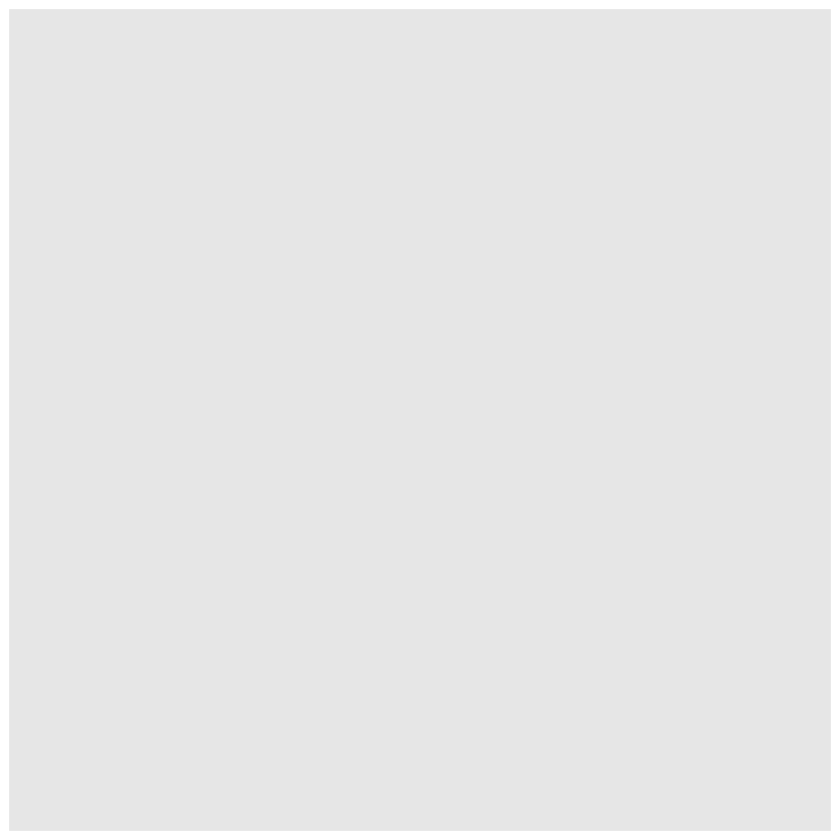

In [5]:
ggplot(data = mydata)

We now need to provide the aesthetic mapping. Among other things, this will tell `ggplot` which variable will be displayed on each of the two axes. Let us put the baseline score on the x axis and the endline year 3 score on the y axis. 

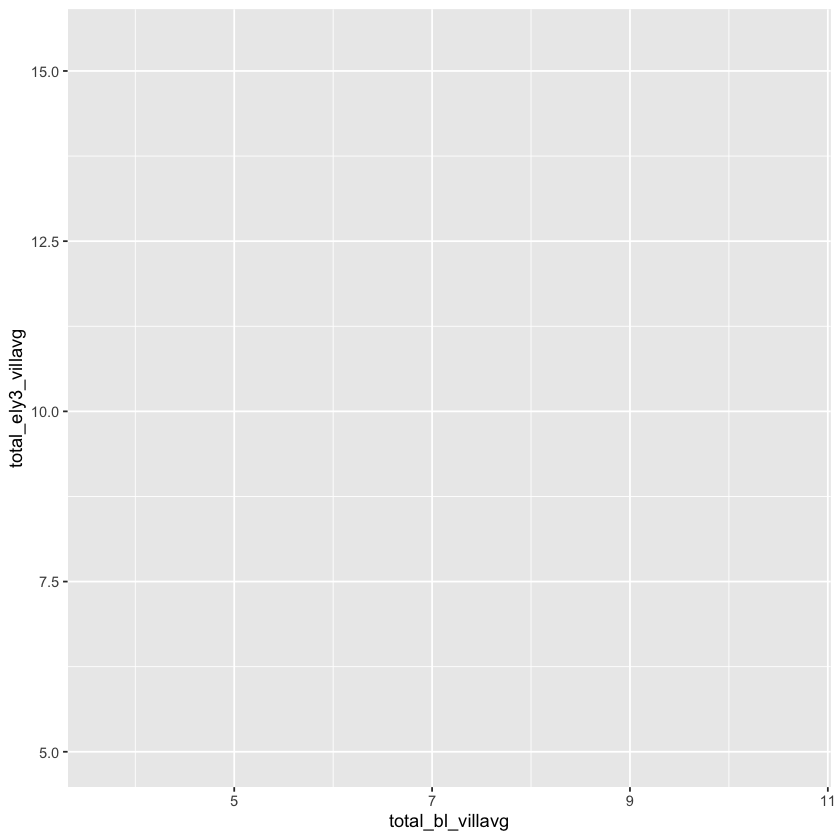

In [6]:
ggplot(data = mydata, mapping = aes(x = total_bl_villavg, y = total_ely3_villavg))

Our graph is starting to take shape! We now have the coordinate system that we are familiar with.   
The command above is very detailed and can be made more concise. 

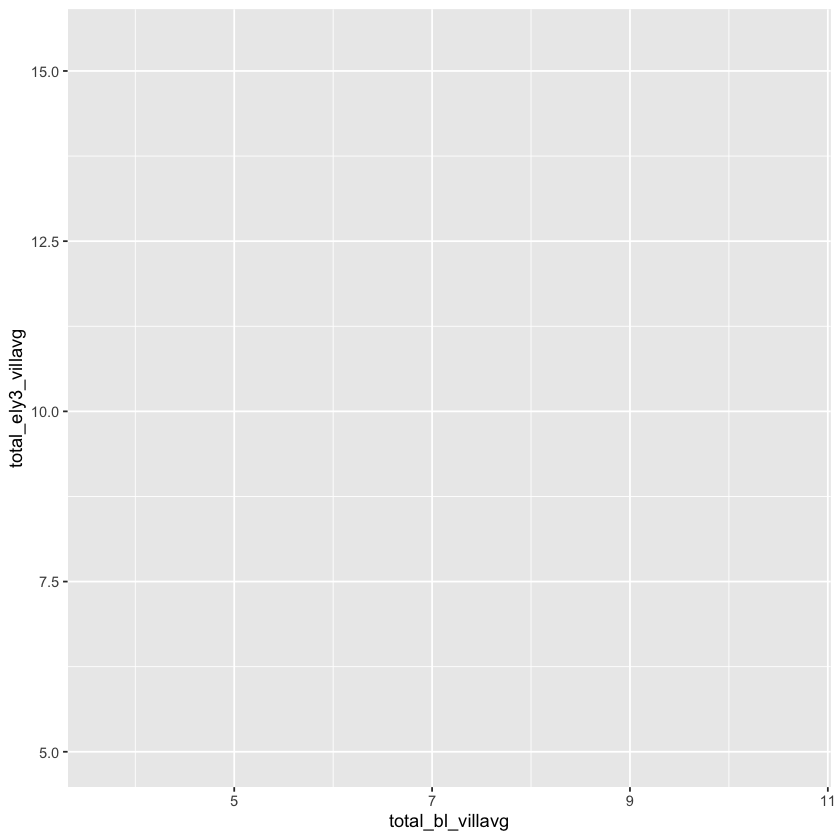

In [7]:
ggplot(mydata, aes(total_bl_villavg, total_ely3_villavg))

While the above command works, we recommend that you explicitly mention the `x` and `y` mapping within the `aes` function. That will ensure that you don't mix up your axes.

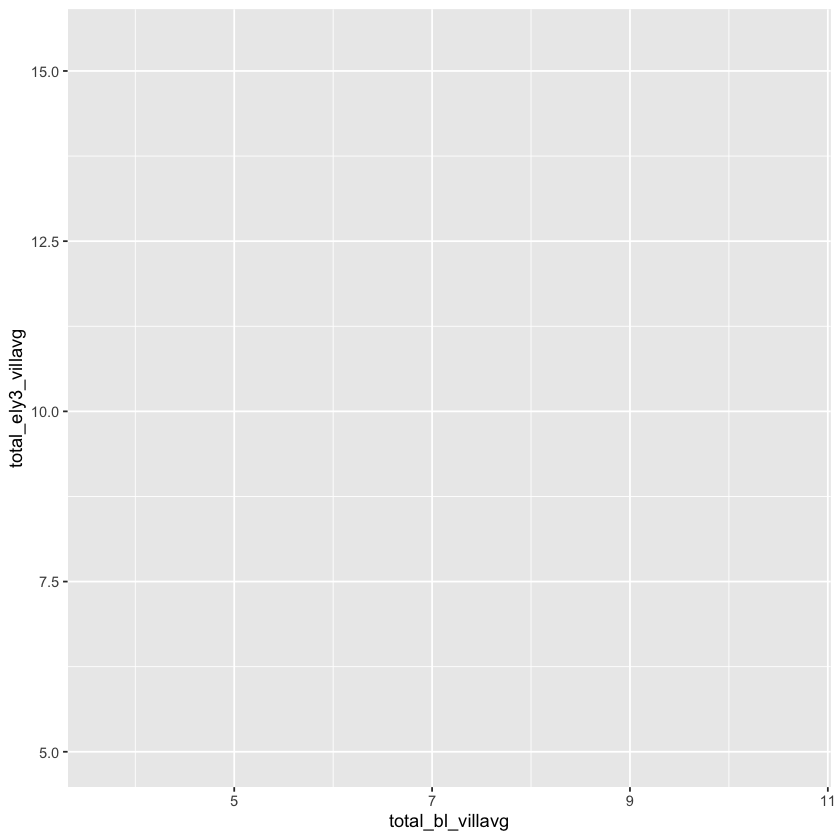

In [8]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg))

As mentioned previously, we want to create a scatter graph to plot the correlation between two variables. *Layering* is at the center of `ggplot` syntax. So we will add the scatter points by *layering* it on top of the graph that we have prepared thus far. This is achieved with the `+` operator.  

Warning message:
“Removed 5 rows containing missing values (geom_point).”


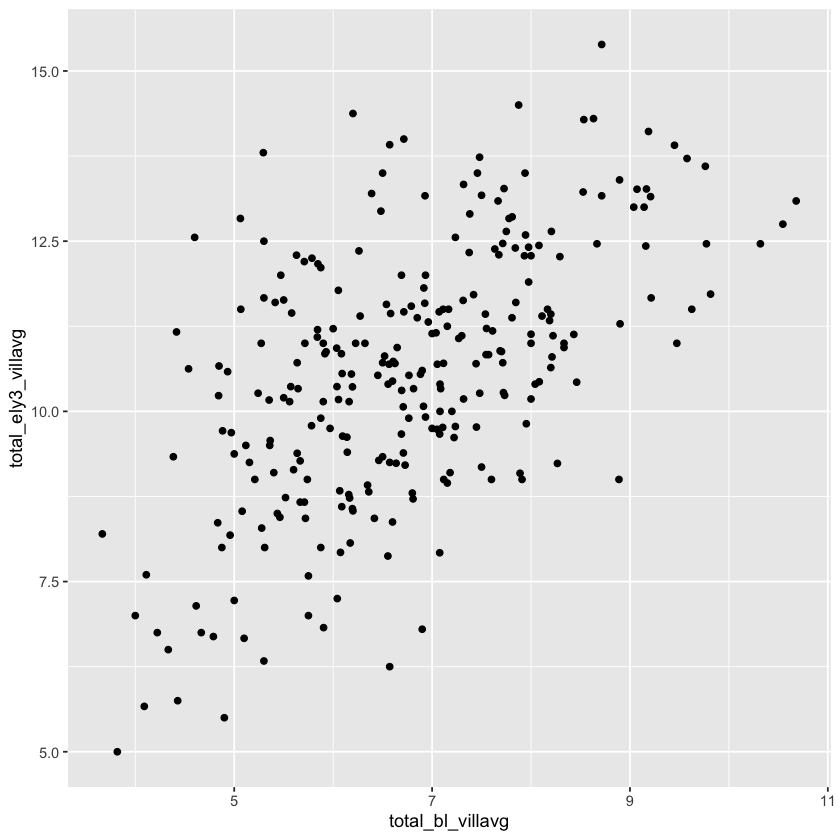

In [9]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point()

And just like that, we have a functional graph! However, before we do other things, let's unpack what is going on when we run the above command.       
Here's the full set of parameters (along with their default arguments) that `geom_point()` can accommodate:   
```R
geom_point(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  ...,
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)
```

So it appears that can pass numerous arguments inside `geom_point()`, but we are not passing anything and we are still getting a graph. So you might ask, how is this happening?   

The `geom_point()` geometric object is *inheriting* the information it needs from the `ggplot()` object. If we look at the our `ggplot()` code, we can see that we have already provided information about three things: 
1. The dataset being used is `mydata`
2. The x-axis variable is `total_bl_villavg`
3. The y-axis variable is `total_ely3_villavg`

Turns out, this is all we need to produce the scatter graph. Of course this is made possible by the `inherit.aes` argument having a default value of `TRUE`. If you run the following code block, you will get an error:
```R
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(inherit.aes = FALSE)
```
So what if we didn't pass any arguments in `ggplot()`? Well, we would need to pass them in `geom_point()` like this:

Warning message:
“Removed 5 rows containing missing values (geom_point).”


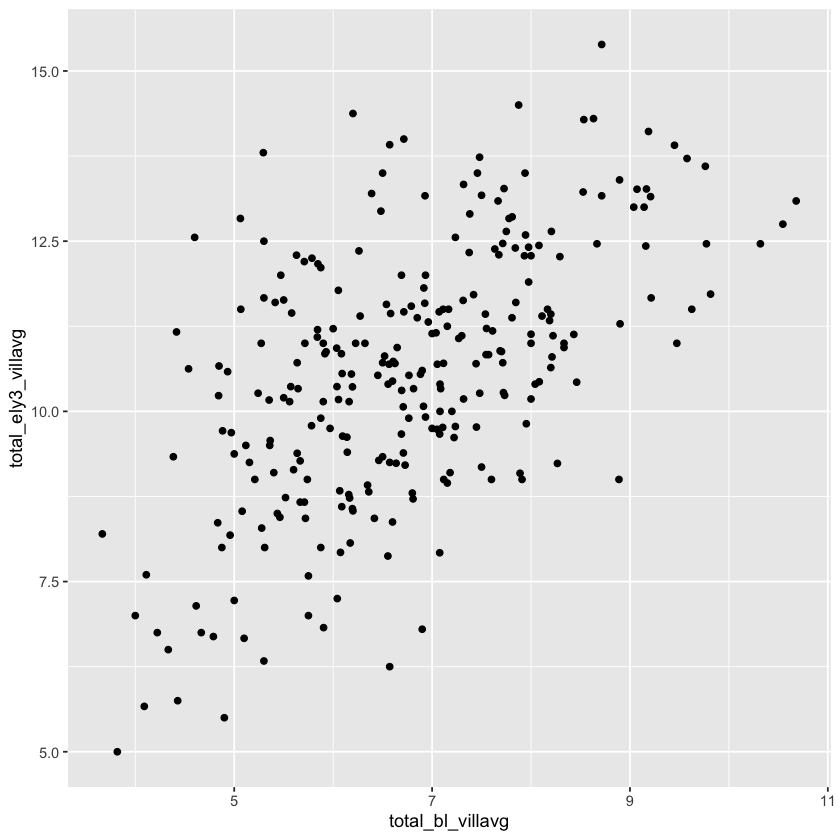

In [10]:
ggplot() +
    geom_point(aes(x = total_bl_villavg, y = total_ely3_villavg), mydata)

You might have noticed that we are writing the `aes` function *before* specifying the dataset. This is in line with how the parameters are ordered (see above). And yes, in case you are wondering, if we look at the  we can pass in `ggplot()`, the `data` parameter comes before the `mapping` parameter:  
```R
ggplot(data = NULL, mapping = aes(), ..., environment = parent.frame())
```

You can always manually specify *which* parameter you are referring to, and the order wont matter, as shown here:

Warning message:
“Removed 5 rows containing missing values (geom_point).”


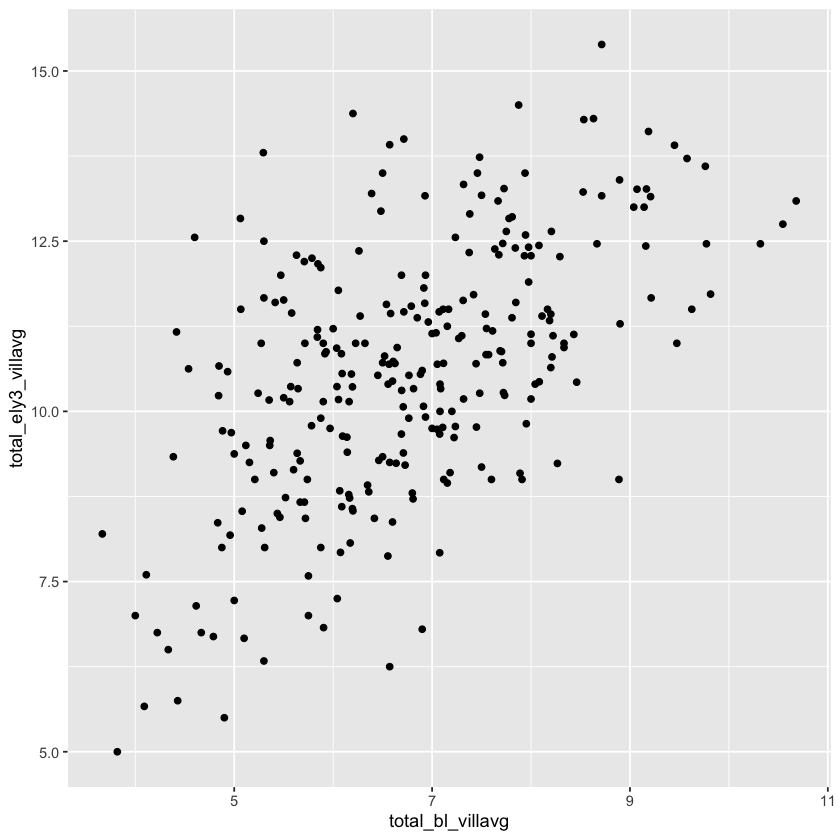

In [11]:
ggplot() +
    geom_point(data = mydata, aes(x = total_bl_villavg, y = total_ely3_villavg))

<div class="alert alert-block alert-info">
    
Note the difference between parameters and arguments:   
<b>Function parameters</b> are the names listed in the function's definition.    
<b>Function arguments</b> are the real values passed to the function. Parameters are initialized to the values of the arguments supplied.

</div>

Now, you might be wondering, why bother *ever* passing arguments to the `ggplot()` object?   
The answer is efficiency. Let's see how.    
Assume now that we want to add a fitted line as well. We would need to use the `geom_smooth()` object. As with the `geom_point()` object, we will add it as a layer. Let's also get rid of that warning message by setting the `na.rm` parameter as `TRUE` for both geometric objects. 

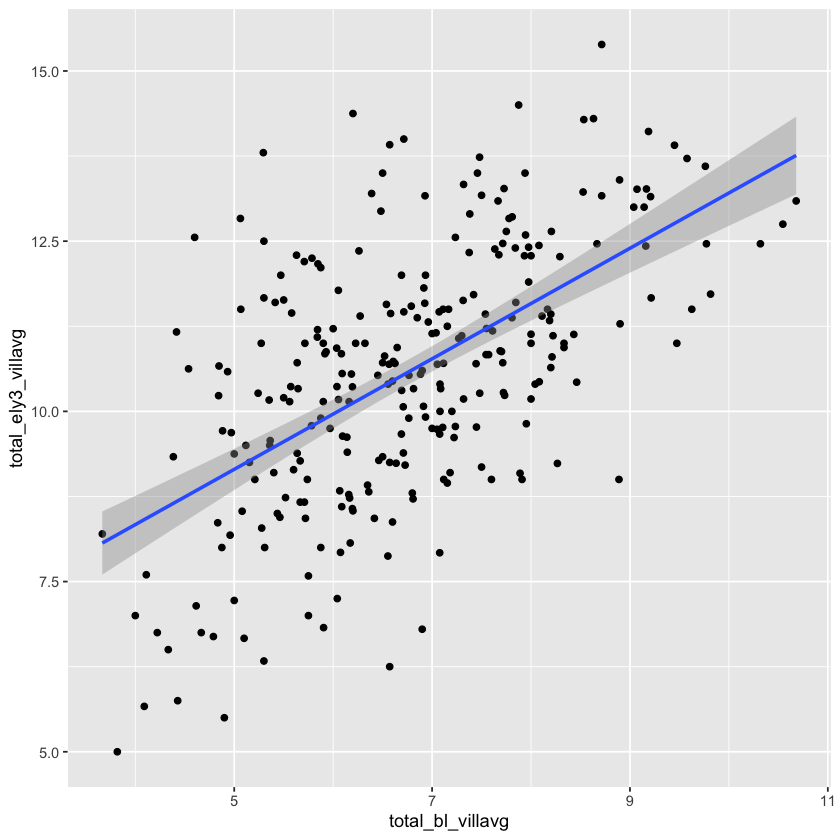

In [12]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE)

Before we discuss the parameters that we *have* used, notice what we did not use. Since we have already specified the dataset along with the x and y axis aesthetic mapping in the base `ggplot()` object, we no longer have to pass the same information to any geometric objects we use after that. So if you have information which is going to be reused by several geometric objects, it is good practice to pass it inside the `ggplot()` object.
<br>
<br>
We have used two new parameters in the `geom_smooth()` object:
1. `method` allows us to specify what kind of model we want to run. Here we have entered `lm`, which stands for a linear model. 
2. `formula` allows us to specify the regression equation. Here the the dependent variable is `y` and we have only one independent variable `x`. 

<div class="alert alert-block alert-warning">

Quick note on syntax: The `+` operator must appear at the end of the line. The following code will return an error:
    
```R
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) 
    + geom_point() +
    geom_smooth(method = lm, formula = y ~ x)
```

</div>

### Customizing aesthetics

We have only scratched the surface of what the `aes` parameter can do. In `ggplot`, the aesthetic is a mapping between variable and a visual cue. Some of the common aesthetics we can control include: 
* __Position (i.e., on the x and y axes)__
* Color (“outside” color)
* Fill (“inside” color)
* Shape (of points)
* Line type
* Size

Let's add a few of the unused ones in our graph.
#### `color`
Can be used show which points belong to the treatment and control groups. 

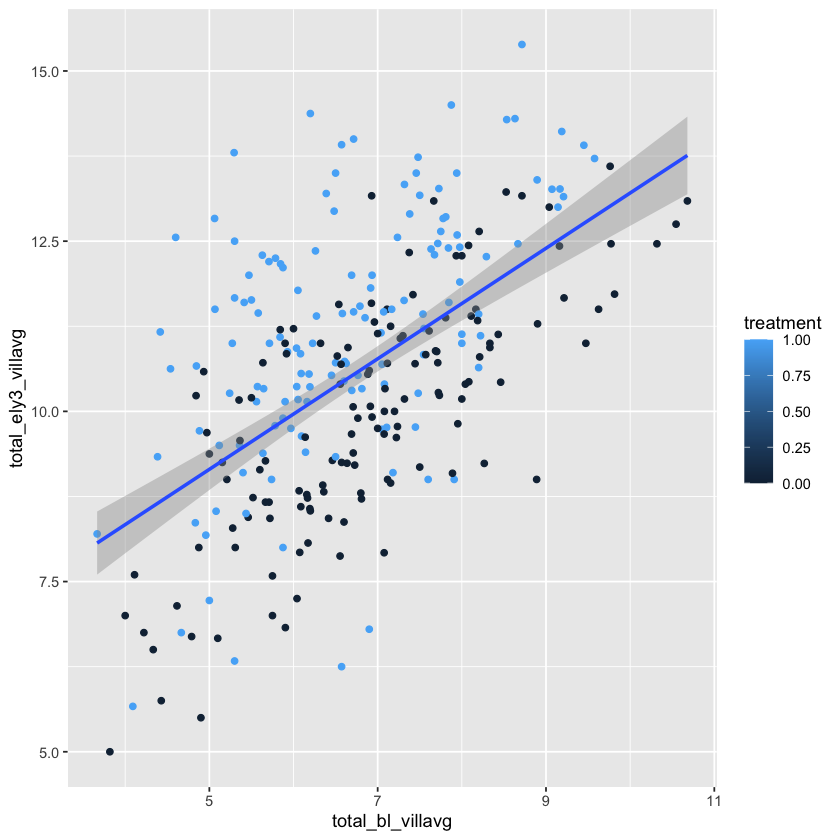

In [13]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = treatment), na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE)

The points now have two colors, corresponding to their treatment status. However legend is presented as a continuous scale of colors, even though only two shades of blue are plotted (light and dark blue). This is happening because `ggplot` does not explicitly know that treatment status only has two values, 0 and 1. `ggplot` is handling the `treatment` variable as a continuous variable, where it could take *any* value between 0 and 1, such as 0.1, 0.78, 0.81 etc. We can ask `ggplot` to handle `treatment` as a discrete variable by using the `factor()` function.

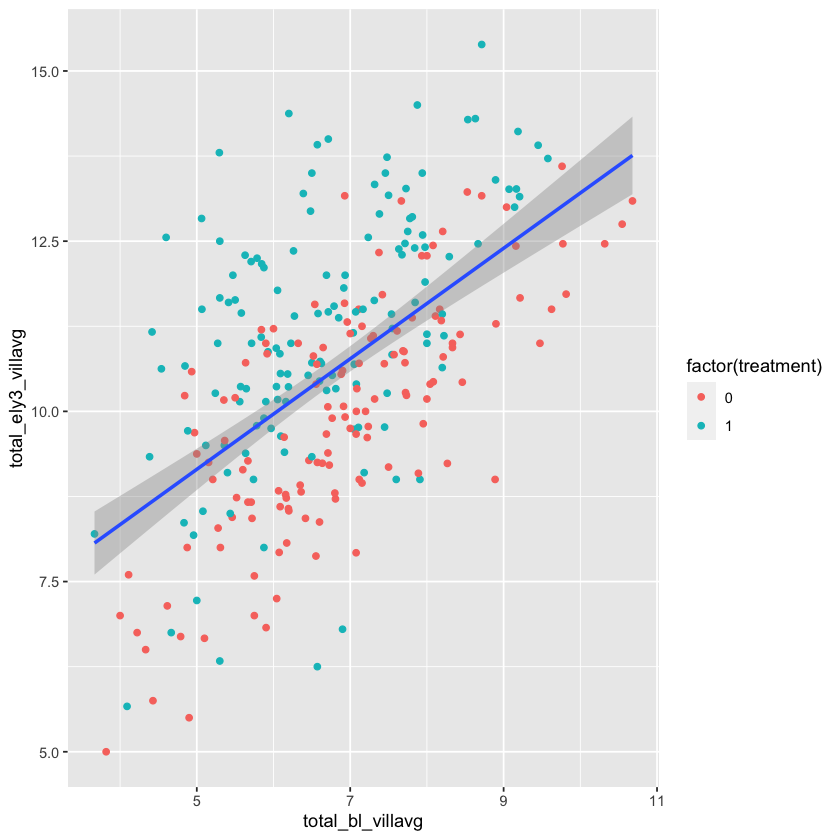

In [14]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE)

#### `size`
Can be used to show the number of students.

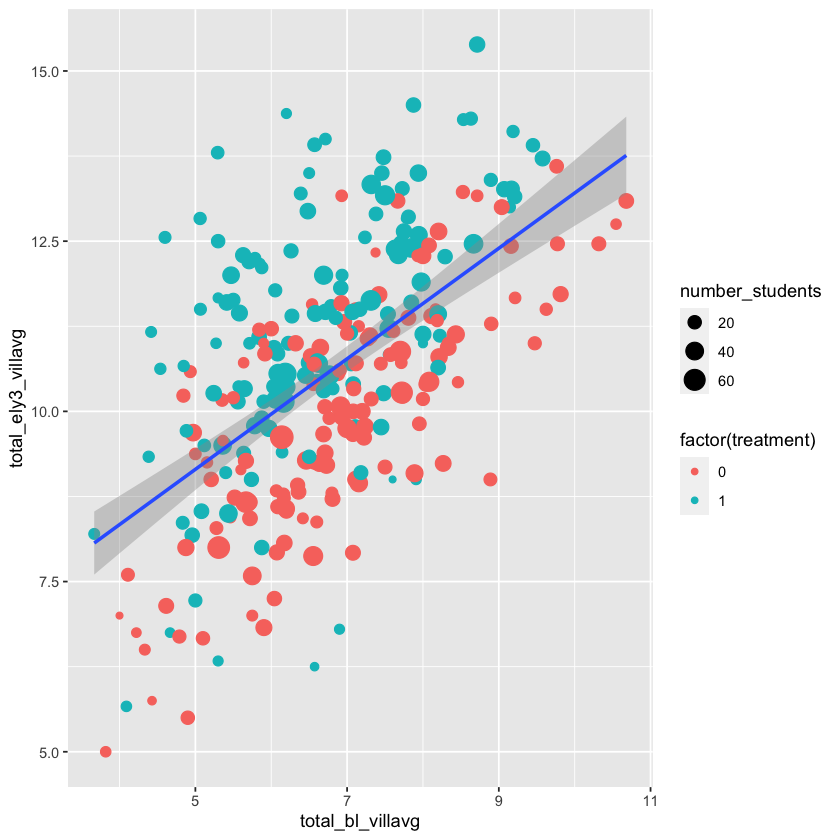

In [15]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment), size = number_students), na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE)

#### `shape`
Can be used to display information such as the district in which the village is located in. Our dataset currently does not have district information, so let's add it. Since the district variable is discrete, that is, a value of 1.2 does not make sense, we will include it as a factor. 

In [16]:
mydata$district <- factor(sample.int(3, nrow(mydata), replace = T))
head(mydata)

village_id_rand treatment total_bl_villavg hindi_bl_villavg math_bl_villavg
1 1               1         7.051282         2.641026         2.230769       
2 2               0         7.269231         2.653846         2.615385       
3 3               1         6.142857         2.142857         2.071429       
4 4               1         7.480000         3.000000         2.320000       
5 5               0         5.352941         2.000000         2.058824       
6 6               0         8.266666         3.366667         2.600000       
  english_bl_villavg total_ely1_villavg hindi_ely1_villavg math_ely1_villavg
1 2.179487           10.120000          4.120000           3.320000         
2 2.000000           10.142858          4.214286           3.357143         
3 1.928572            9.000000          3.500000           2.750000         
4 2.160000           11.600000          5.200000           3.466667         
5 1.294118            7.181818          2.909091           2.363636         
6 2.300000           12.235294          4.764706           3.823529         
  english_ely1_villavg ⋯ math_ely2_villavg english_ely2_villavg
1 2.680000             ⋯ 2.800000          2.600000            
2 2.571429             ⋯ 3.500000          3.071429            
3 2.750000             ⋯ 1.857143          2.285714            
4 2.933333             ⋯ 3.933333          3.800000            
5 1.909091             ⋯ 4.000000          2.875000            
6 3.647059             ⋯ 3.647059          3.000000            
  total_ely3_villavg hindi_ely3_villavg math_ely3_villavg english_ely3_villavg
1  9.736842          3.210526           3.263158          3.263158            
2 11.071428          4.642857           3.357143          3.071429            
3  9.400000          2.800000           3.400000          3.200000            
4 13.733334          4.866667           4.600000          4.266667            
5 10.166667          3.666667           3.666667          2.833333            
6  9.235294          3.647059           3.235294          2.352941            
  child_female_villfrac child_scst_villfrac number_students district
1 0.4871795             0.3589744           39              3       
2 0.5000000             0.6923077           26              1       
3 0.5714286             0.0000000           14              3       
4 0.5200000             0.1600000           25              1       
5 0.6470588             0.0000000           17              2       
6 0.5000000             0.1666667           30              1

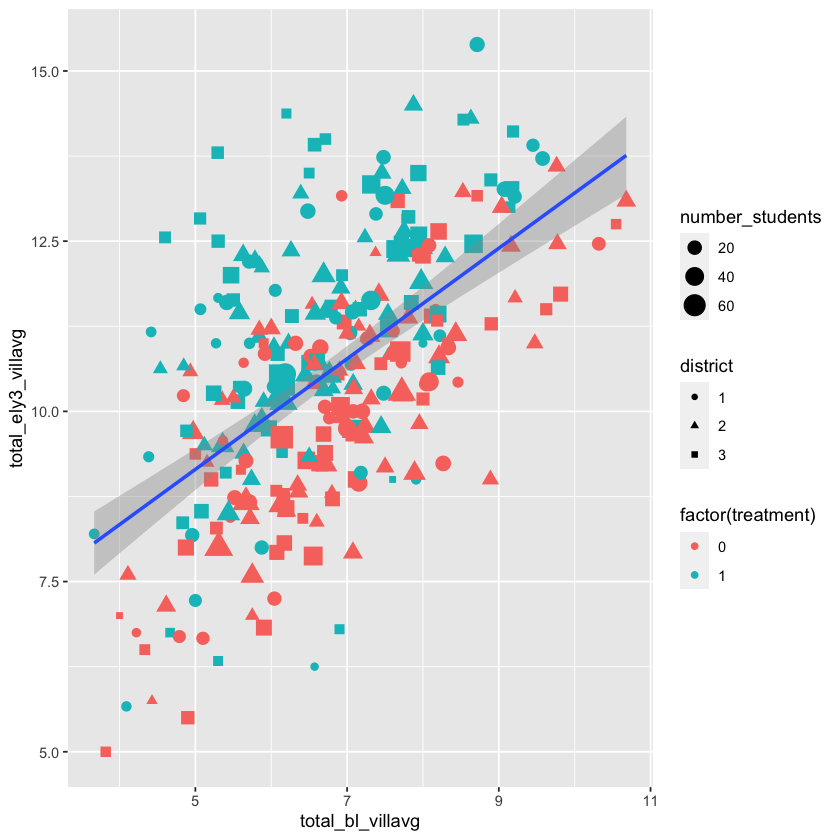

In [17]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment), size = number_students,
                  shape = district), na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE)

We have created a graph which takes advantage of the following aesthetics:
1. Position
2. Color
3. Size
4. Shape

However, just because we can, doesn't mean that we should include each and every possible aesthetic. Inclusion and exclusion of aesthetic mappings should be dependent on what information we are trying to convey. In this example, it is probably most informative if we only keep the `color` aesthetic to show the split between treatment and control villages. 

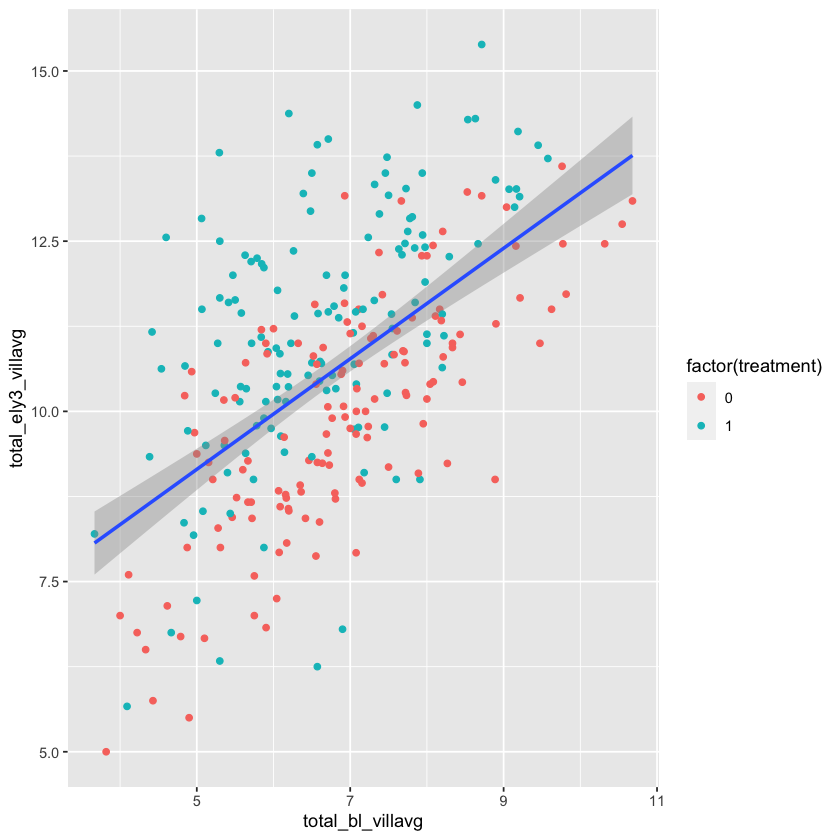

In [18]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE)

#### Visual modifications without `aes`

`ggplot` also allows us to modify how the data is plotting without mapping a variable to a particular aesthetic. For example, we can manually set the `color`, `size` and `shape` of the points.

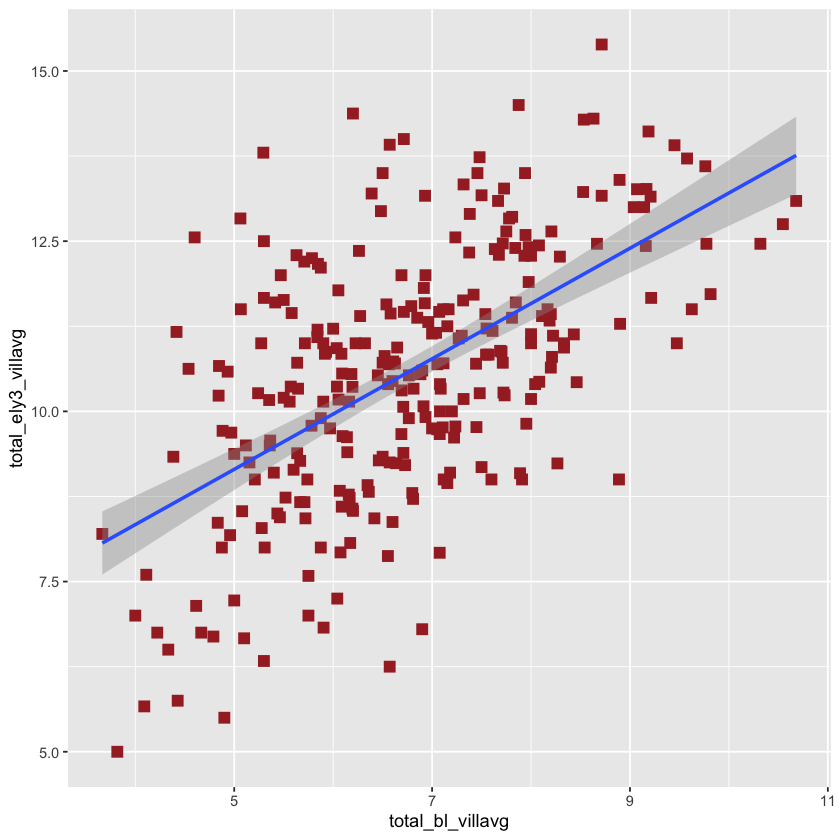

In [19]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), 
               color = "brown", 
               size = 3,
               shape = "square",
               na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE)

Note that the `color` specified through the `aes` mapping is suppressed if we manually set these arguments. 

### Common graph overlays

Some common graph overlays include:
1. Fitted lines
2. Confidence intervals
3. Reference lines
4. Text

We have already added a fitted line and its corresponding CI envelope thanks to the `geom_smooth` object. But here are a few ways it can be modified:
* __Multiple fitted lines according to treatment status__

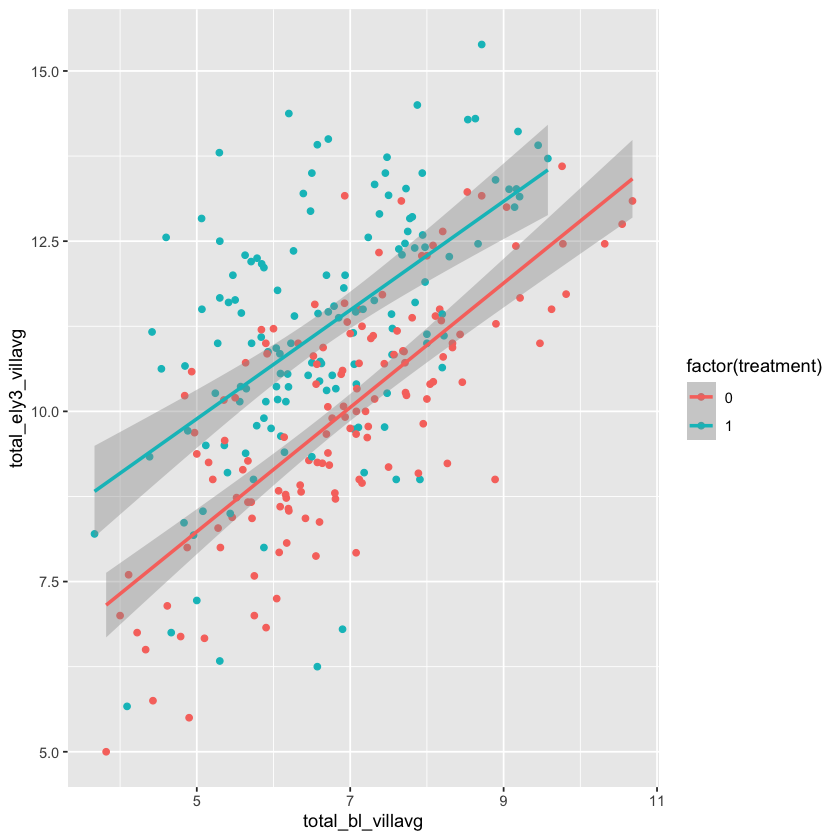

In [20]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
    geom_smooth(aes(color = factor(treatment)),
                method = lm, formula = y ~ x,
                na.rm = TRUE)

* __Changing the level of the confidence interval__ (`level`; default is 95%)

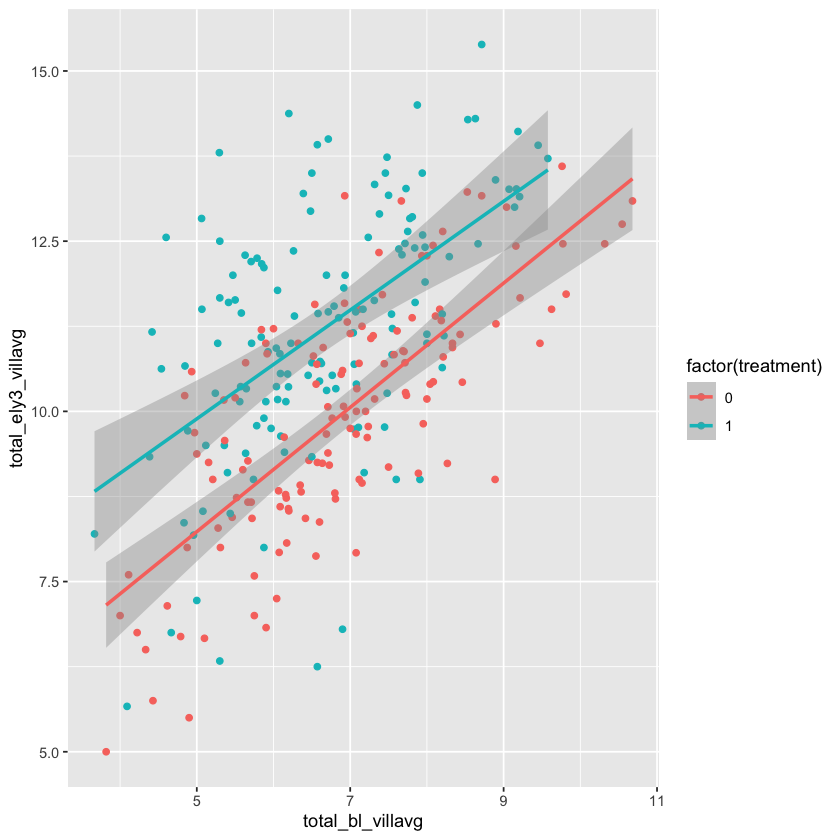

In [21]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
    geom_smooth(aes(color = factor(treatment)),
                method = lm, formula = y ~ x, level = 0.99,
                na.rm = TRUE)

* __Changing the shade of the confidence interval__ (`fill`)

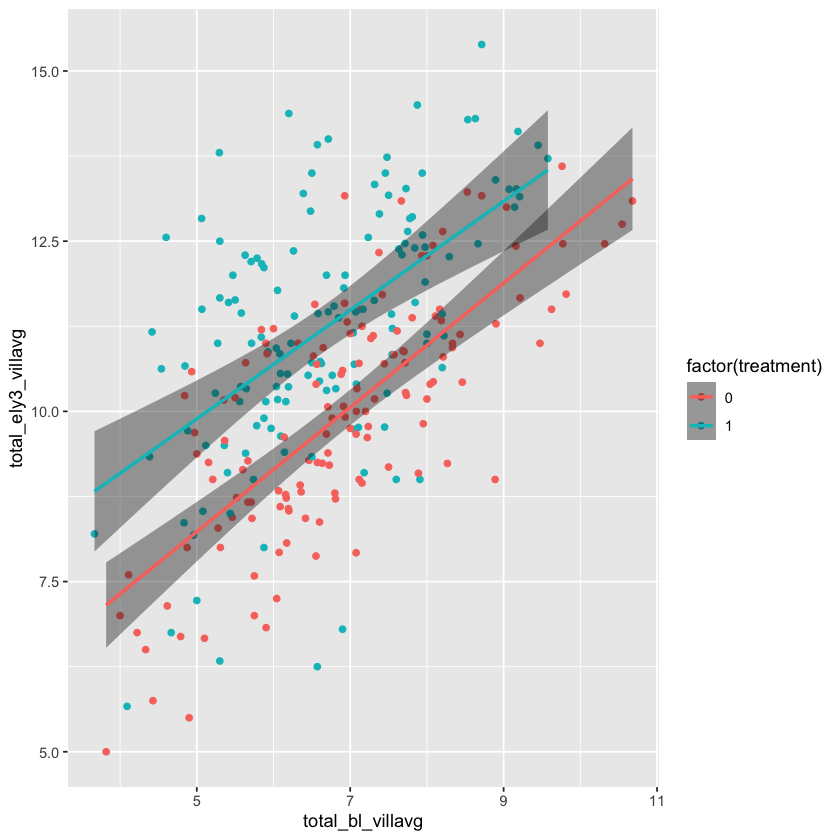

In [22]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
    geom_smooth(aes(color = factor(treatment)),
                method = lm, formula = y ~ x, level = 0.99, fill = "grey10",
                na.rm = TRUE)

* __Hiding the confidence interval__ (`se`)

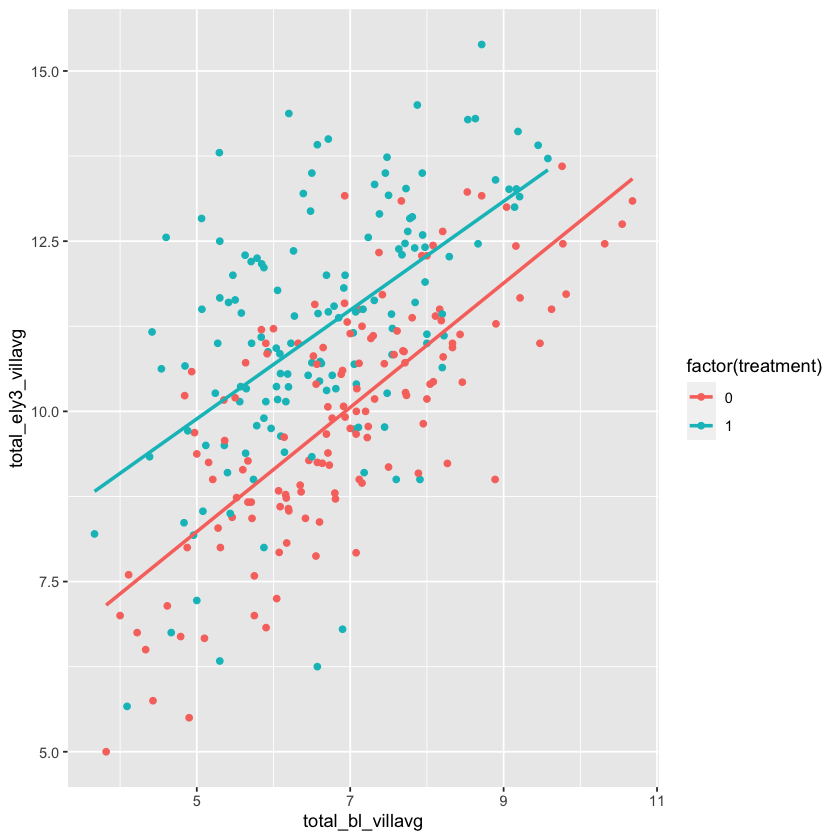

In [23]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
    geom_smooth(aes(color = factor(treatment)),
                method = lm, formula = y ~ x, level = 0.99, fill = "grey10", se = FALSE,
                na.rm = TRUE)

#### Reference lines

__`geom_vline` for vertical lines__

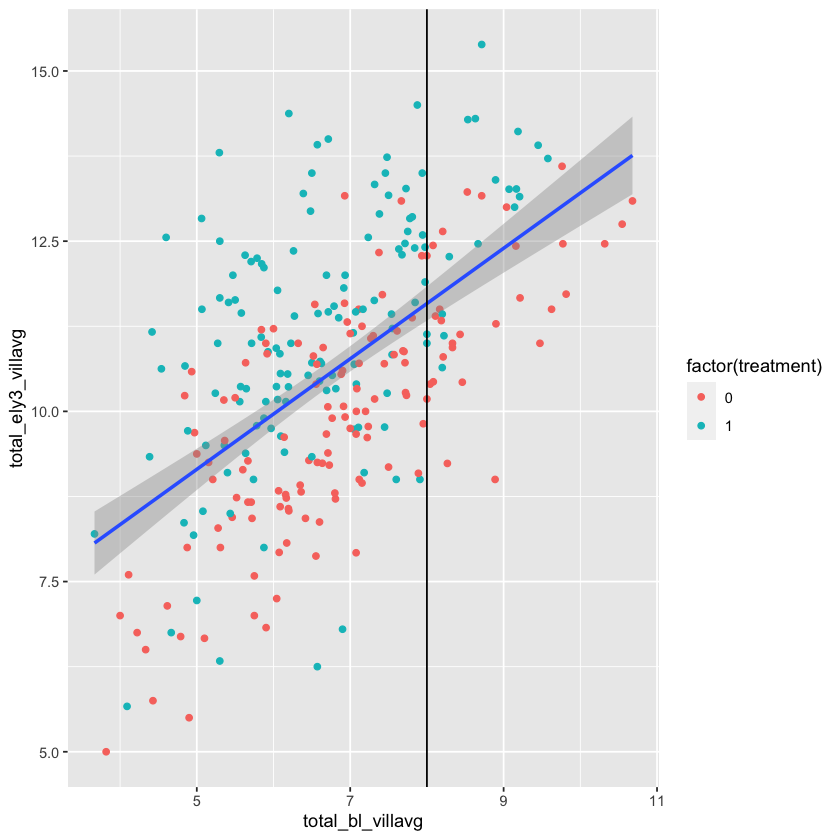

In [24]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
    geom_vline(xintercept = 8)

You can also add several lines at once:

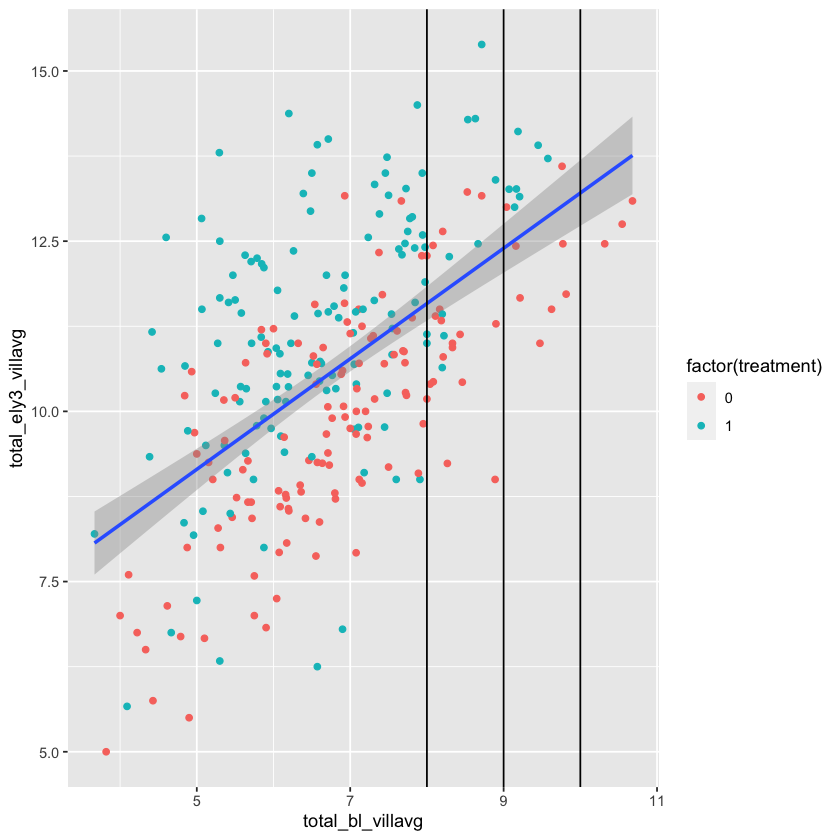

In [40]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
    geom_vline(xintercept = 8:10)

Change the color:

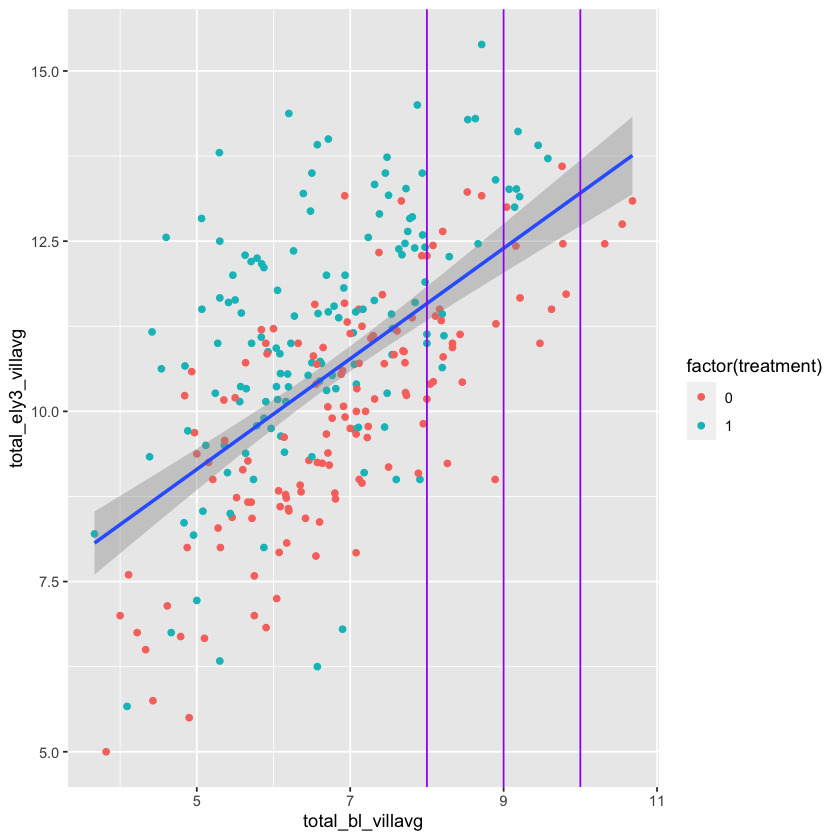

In [45]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
    geom_vline(xintercept = 8:10,
               color = "purple")

Change the line type:

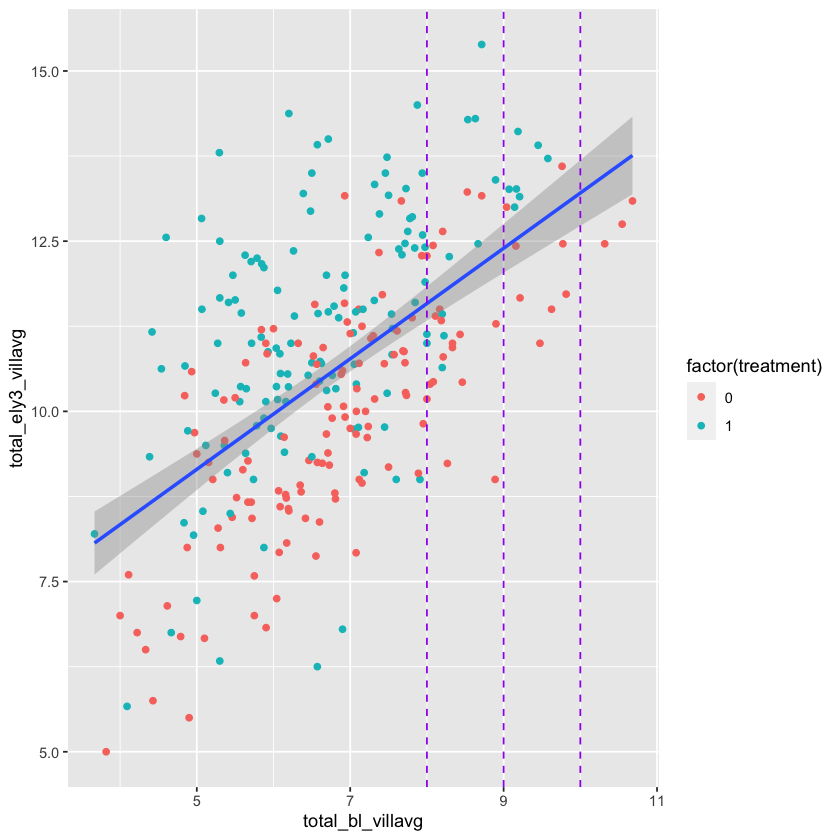

In [46]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
    geom_vline(xintercept = 8:10,
               color = "purple",
               linetype = 8)

__`geom_hline` for horizontal lines__

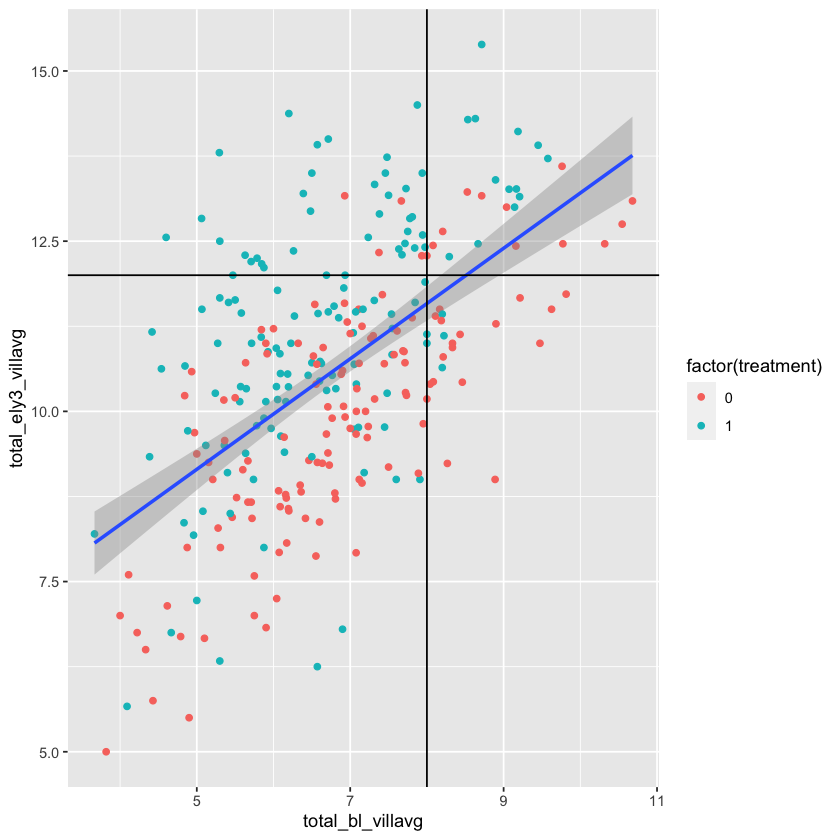

In [25]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
    geom_vline(xintercept = 8) +
    geom_hline(yintercept = 12)

__`geom_abline` for lines with slope and intercept__   
A 45&deg; line has a slope of 1

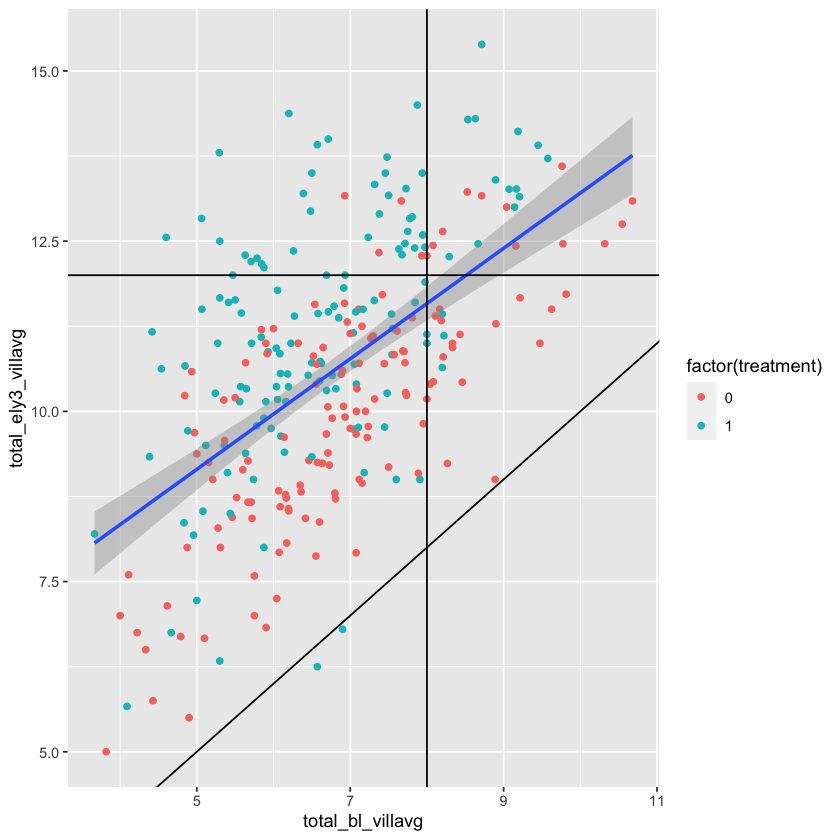

In [26]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
    geom_vline(xintercept = 8) +
    geom_hline(yintercept = 12) + 
    geom_abline(slope = 1, intercept = 0)

__`geom_segment`__ for line segments

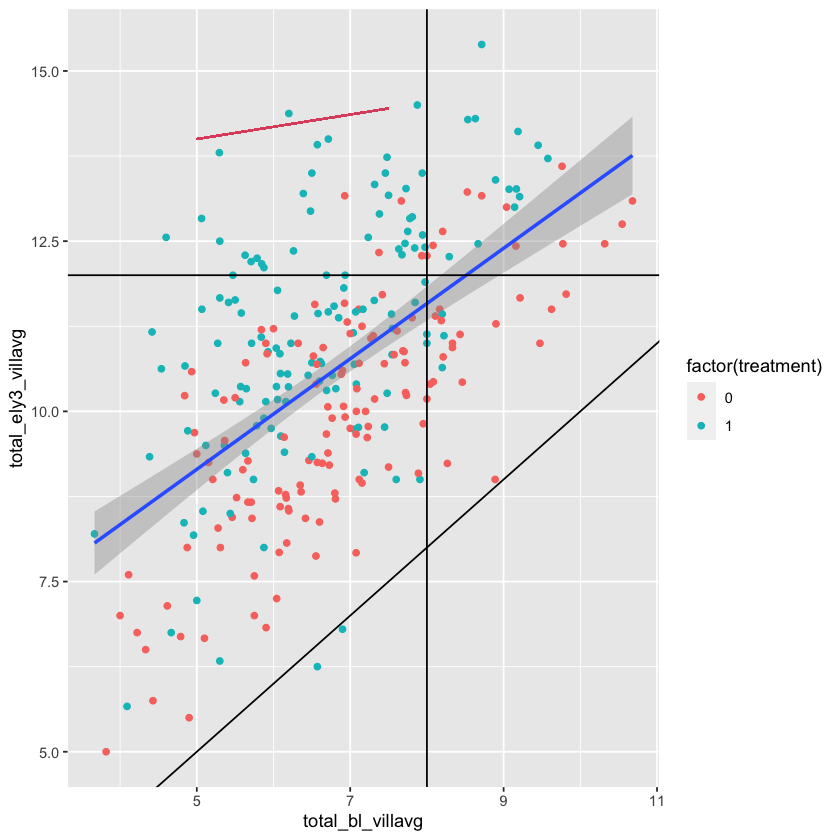

In [52]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
    geom_vline(xintercept = 8) +
    geom_hline(yintercept = 12) + 
    geom_abline(slope = 1, intercept = 0) +
    geom_segment(x = 5, y = 14,
                 xend = 7.5, yend = 14.45,
                 color = 2)

Use the `arrow` parameter if you want to add an arrow at the end of the line segment:

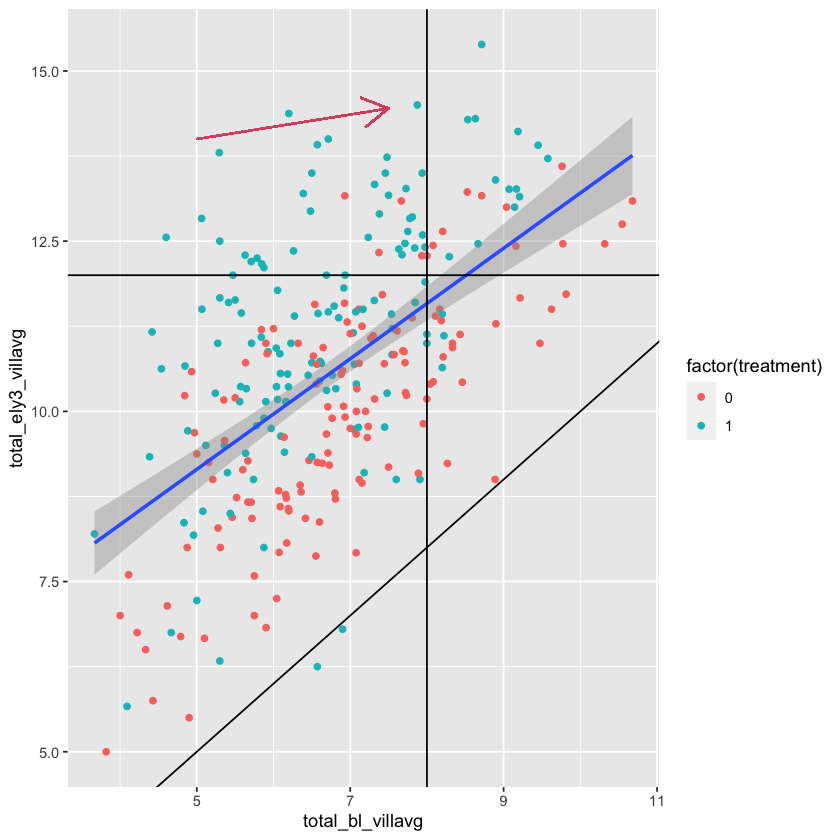

In [53]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
    geom_vline(xintercept = 8) +
    geom_hline(yintercept = 12) + 
    geom_abline(slope = 1, intercept = 0) +
    geom_segment(x = 5, y = 14,
                 xend = 7.5, yend = 14.45,
                 color = 2,
                 arrow = arrow())

__`geom_curve`__ for curves

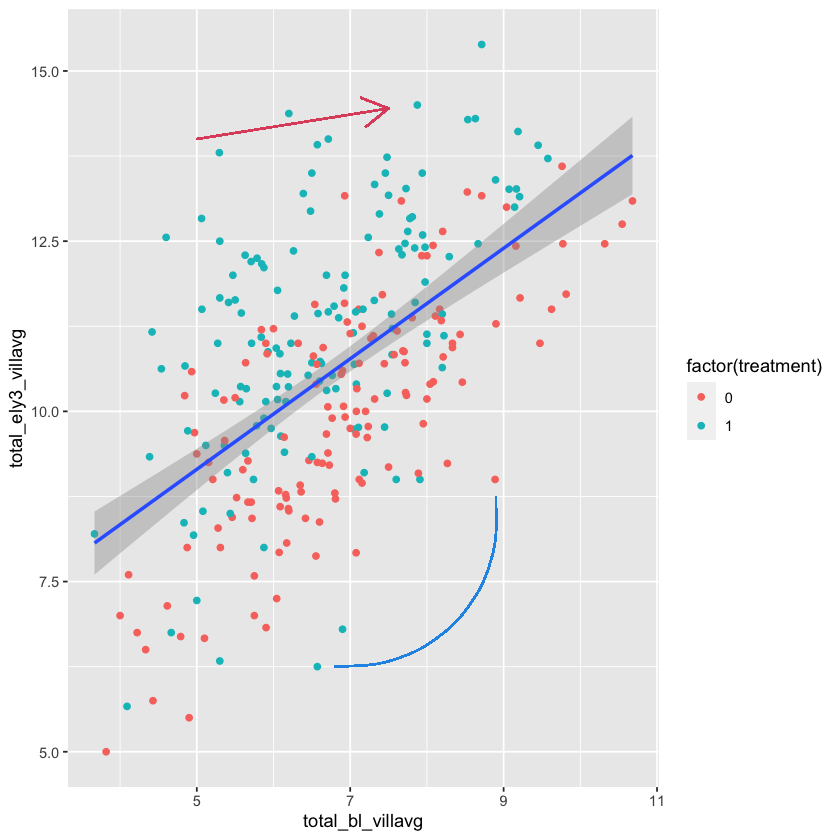

In [60]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
    geom_segment(x = 5, y = 14,
                 xend = 7.5, yend = 14.45,
                 color = 2,
                 arrow = arrow()) +
    geom_curve(x = 6.8, y = 6.25,
               xend = 8.9, yend = 8.75,
               color = 4)

We can change the curvature using the `curvature` parameter. Positive values will produce a right-hand curve:

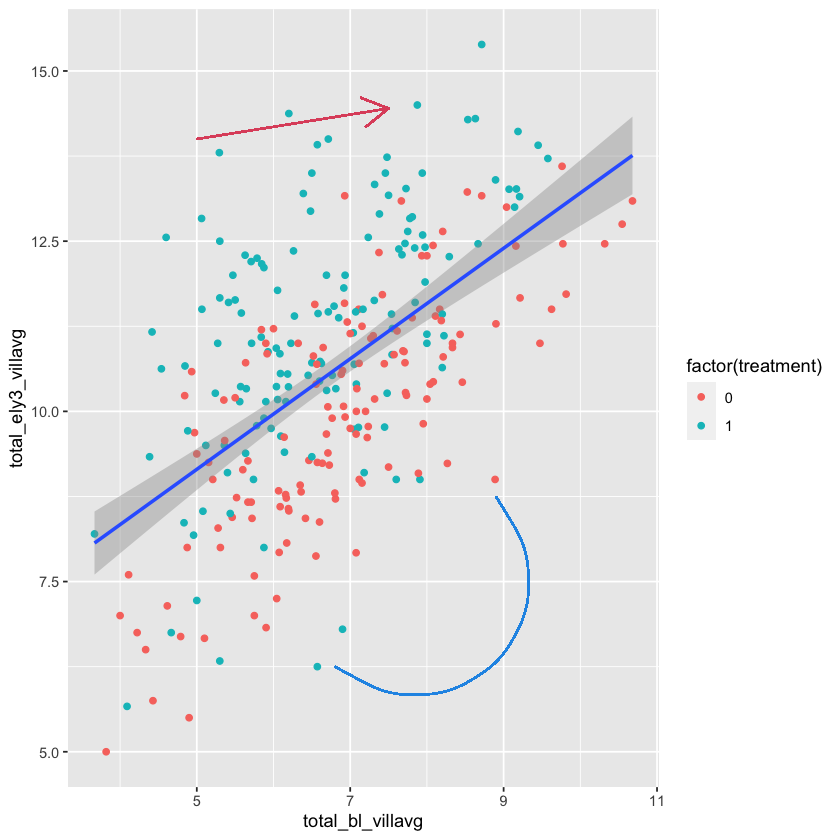

In [62]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
    geom_segment(x = 5, y = 14,
                 xend = 7.5, yend = 14.45,
                 color = 2,
                 arrow = arrow()) +
    geom_curve(x = 6.8, y = 6.25,
               xend = 8.9, yend = 8.75,
               color = 4,
               curvature = 1)

Negative values will produce a left-hand curve:

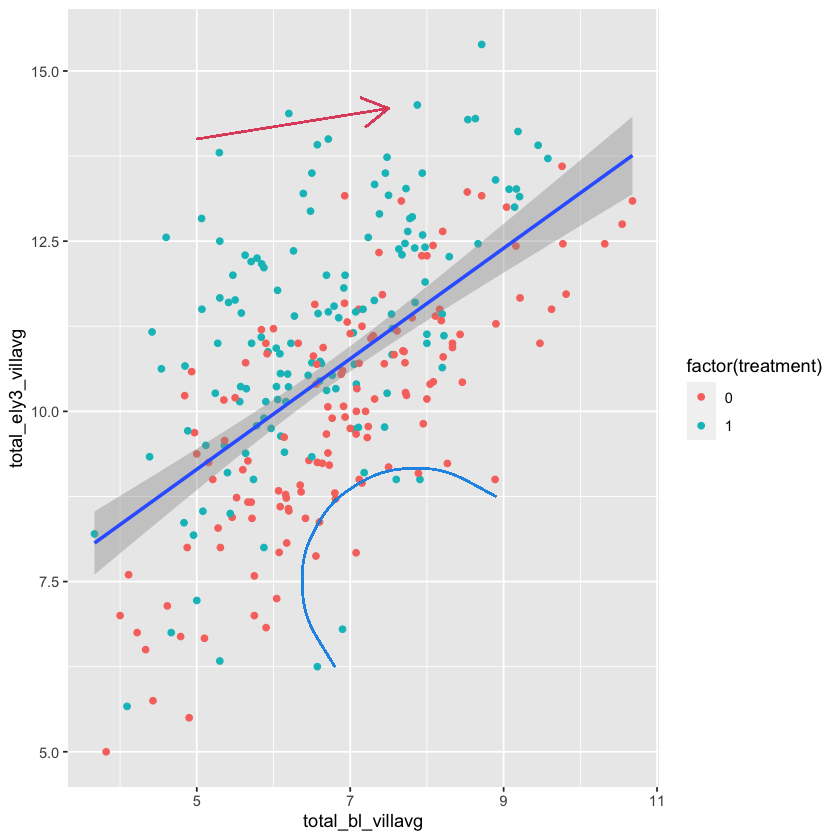

In [63]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
    geom_segment(x = 5, y = 14,
                 xend = 7.5, yend = 14.45,
                 color = 2,
                 arrow = arrow()) +
    geom_curve(x = 6.8, y = 6.25,
               xend = 8.9, yend = 8.75,
               color = 4,
               curvature = -1)

And similar to `geom_segment`, we can add an arrow using the `arrow` parameter:

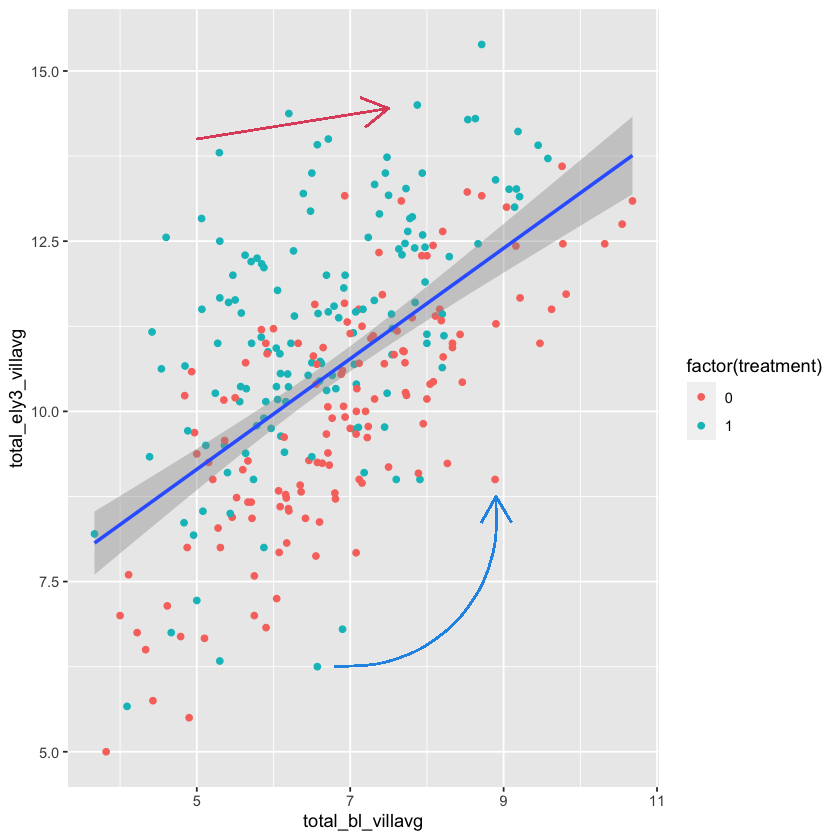

In [64]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
    geom_segment(x = 5, y = 14,
                 xend = 7.5, yend = 14.45,
                 color = 2,
                 arrow = arrow()) +
    geom_curve(x = 6.8, y = 6.25,
               xend = 8.9, yend = 8.75,
               color = 4,
               arrow = arrow())

#### Text
We can also add the slope and standard error on the plot region. However to achieve this, we will need to store the values in variables. 

In [28]:
model <- lm(total_ely3_villavg ~ total_bl_villavg, data = mydata)
model_summary <- summary(model)
model_summary

slope <- round(model_summary$coefficients[2,1], 2)
se <- round(model_summary$coefficients[2,2], 2)
print(paste0("The slope is ", slope, ", the SE is ", se))


Call:
lm(formula = total_ely3_villavg ~ total_bl_villavg, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1740 -1.0768 -0.0028  0.9537  4.4129 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.08910    0.48166   10.57   <2e-16 ***
total_bl_villavg  0.81184    0.06992   11.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.553 on 275 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.329,	Adjusted R-squared:  0.3265 
F-statistic: 134.8 on 1 and 275 DF,  p-value: < 2.2e-16


[1] "The slope is 0.81, the SE is 0.07"


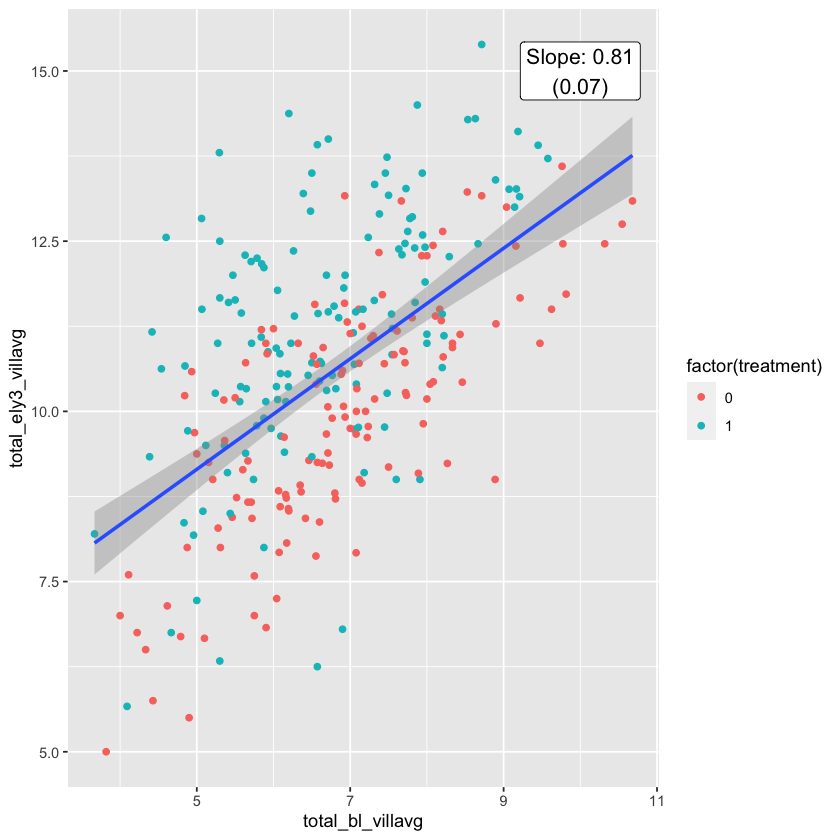

In [29]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(aes(color = factor(treatment)), na.rm = TRUE) +
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE) +
    annotate(geom = "label", x = 10, y = 15, 
             label = paste0("Slope: ", slope, "\n(", se, ")"),
             size = 4.5)

### Storing and exporting graphs

Let's revisit the first graph we created.

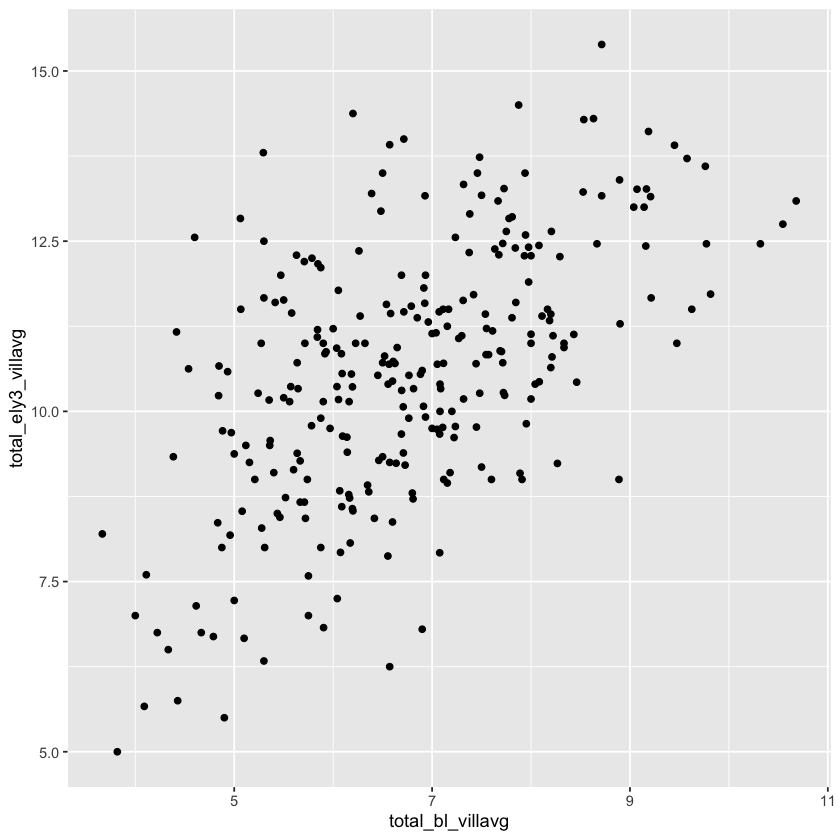

In [30]:
ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
    geom_point(na.rm = TRUE)

We can store this graph in a named geometric object. 

In [31]:
plot1 <- ggplot(mydata, aes(x = total_bl_villavg, y = total_ely3_villavg)) +
            geom_point(na.rm = TRUE)

By doing so, we no longer need to run the code to display the graph again. We can simply refer to it using the name of the object we stored it in.

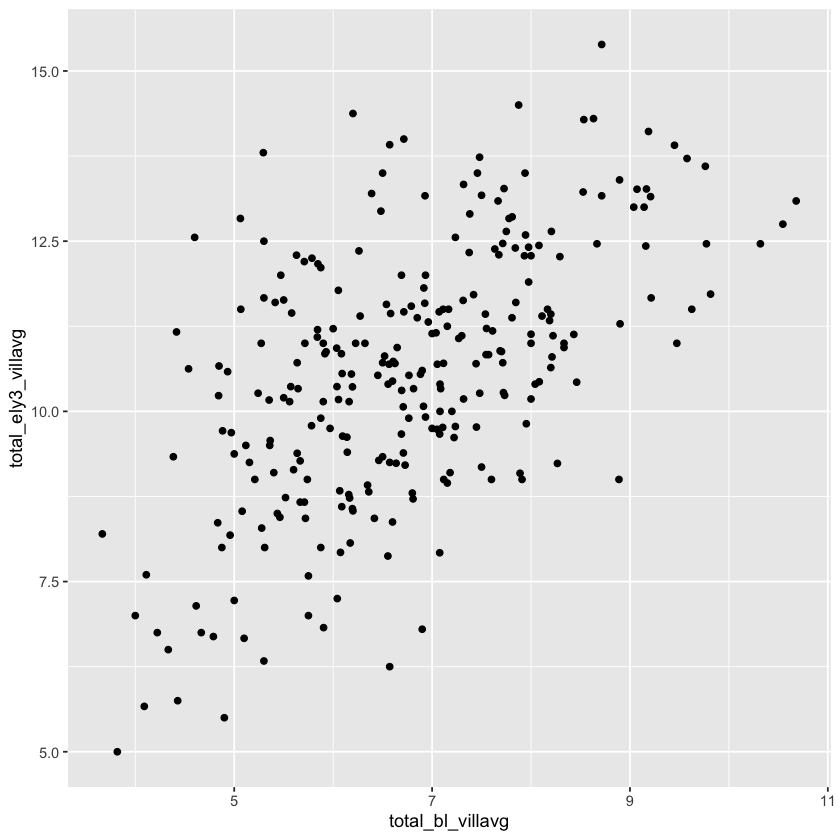

In [32]:
plot1

If we want to add layers, we can add them to `plot1`.

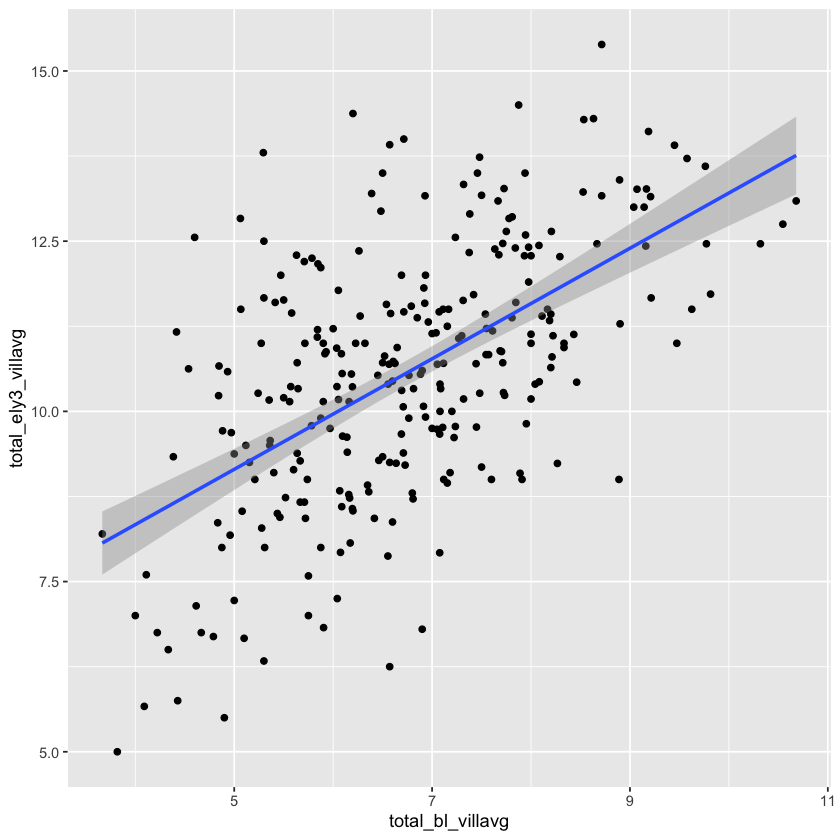

In [33]:
plot1 + 
    geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE)

Important to note however that we haven't changed `plot1` with the above command.

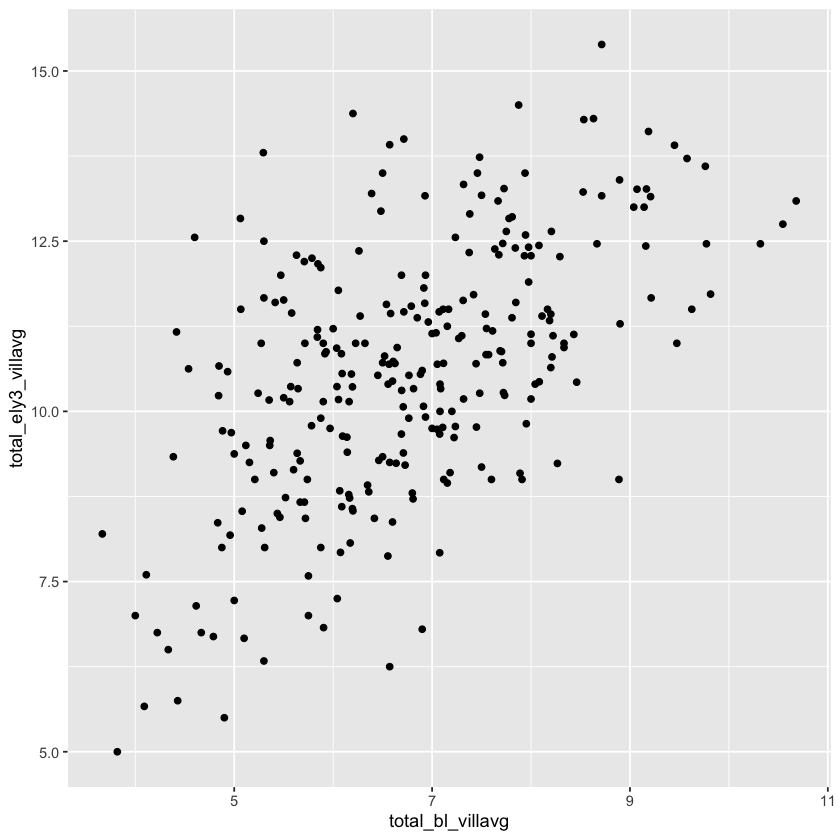

In [34]:
plot1

If we want `plot1` to include the `geom_smooth` layer, we will have to assign it.

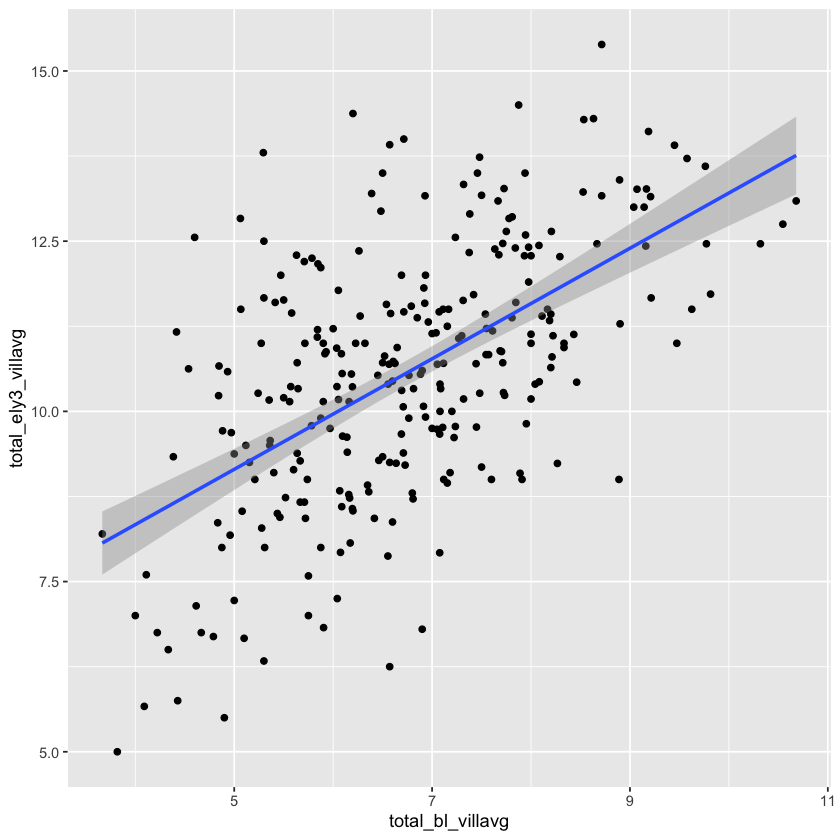

In [35]:
plot1 <- plot1 +
        geom_smooth(method = lm, formula = y ~ x, na.rm = TRUE)
plot1

We can export graphs using the `ggsave` command.

In [36]:
ggsave("~/Dropbox (IDinsight)/Technical bootcamp online/Lessons/R/Data Visualization/Exports/plot1.png")

Saving 7 x 7 in image



By default `ggsave` saves the last plot was shown. If we have multiple plots and want to save a plot that was created previously, we will need to use the `plot` parameter and specify the plot name. 

In [37]:
ggsave("~/Dropbox (IDinsight)/Technical bootcamp online/Lessons/R/Data Visualization/Exports/plot1.png",
       plot = plot1)

Saving 7 x 7 in image



### Credits

This lesson was inspired by content from the following:  

1. [Statistical tools for high-throughput data analysis](http://www.sthda.com/english/wiki/be-awesome-in-ggplot2-a-practical-guide-to-be-highly-effective-r-software-and-data-visualization)
2. [Graphics with ggplot2](https://beanumber.github.io/sds192/lab-ggplot2.html#:~:text=In%20ggplot2%20%2C%20aesthetic%20means%20%E2%80%9Csomething,color%20(%E2%80%9Coutside%E2%80%9D%20color))